In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df = pd.read_csv("ecommerce_data.csv")
df['order_time'] = pd.to_datetime(df['order_time'], format='%d/%m/%Y %H:%M')
df.head()

,product,user_id,order_quantity,review_rating,order_time
0,Sunglasses,user_56,3,4.2,2025-06-10 08:49:00
1,Jeans,user_63,3,3.9,2025-06-20 10:00:00
2,Smartphone,user_36,1,3.4,2025-06-29 01:38:00
3,Jacket,user_72,2,1.6,2025-06-16 03:17:00
4,Backpack,user_49,3,2.8,2025-06-12 18:42:00


C:\Users\Admin\AppData\Local\Temp\ipykernel_2536\2946429239.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_products.values, y=top_products.index, palette='viridis')


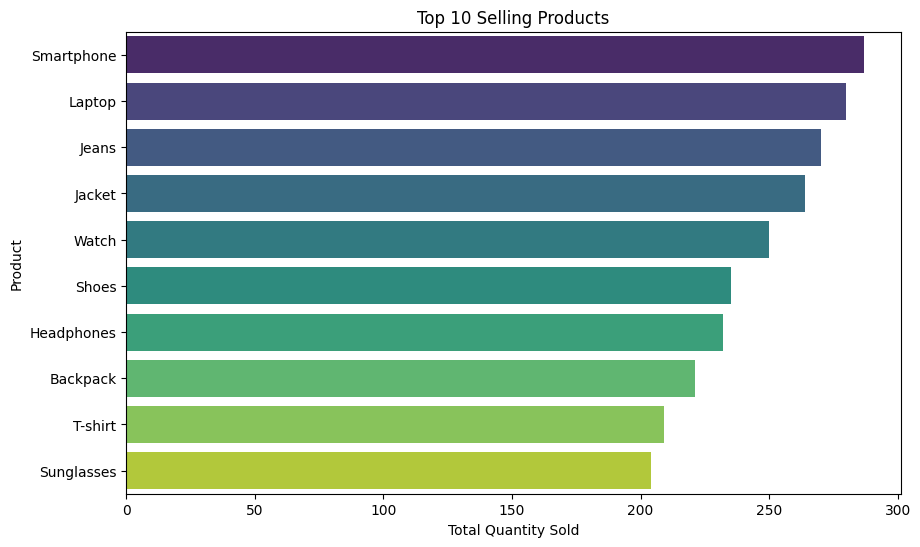

In [6]:
top_products = df.groupby('product')['order_quantity'].sum().sort_values(ascending=False).head(10)

# Bar Chart
plt.figure(figsize=(10,6))
sns.barplot(x=top_products.values, y=top_products.index, palette='viridis')
plt.title('Top 10 Selling Products')
plt.xlabel('Total Quantity Sold')
plt.ylabel('Product')
plt.show()

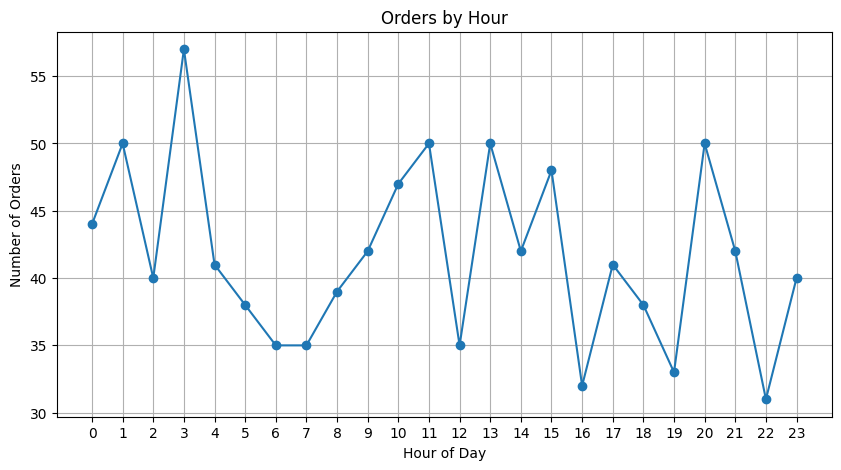

In [7]:
df['hour'] = df['order_time'].dt.hour
orders_by_hour = df['hour'].value_counts().sort_index()

# Line Chart
plt.figure(figsize=(10,5))
plt.plot(orders_by_hour.index, orders_by_hour.values, marker='o')
plt.title('Orders by Hour')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Orders')
plt.grid(True)
plt.xticks(range(0,24))
plt.show()

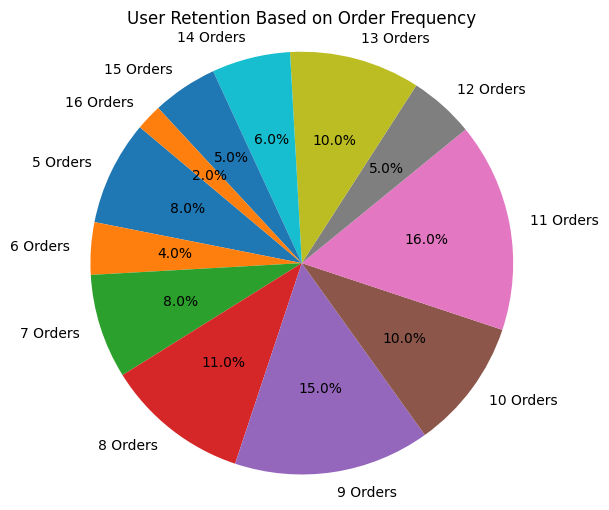

In [8]:
user_orders = df.groupby('user_id')['order_time'].nunique()

# Count how many users have 1 order, 2 orders, etc.
retention = user_orders.value_counts().sort_index()

# Pie Chart
plt.figure(figsize=(6,6))
retention_labels = [f'{i} Orders' for i in retention.index]
plt.pie(retention, labels=retention_labels, autopct='%1.1f%%', startangle=140)
plt.title('User Retention Based on Order Frequency')
plt.axis('equal')
plt.show()

C:\Users\Admin\AppData\Local\Temp\ipykernel_2536\1240914818.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_ratings.values, y=avg_ratings.index, palette='coolwarm')


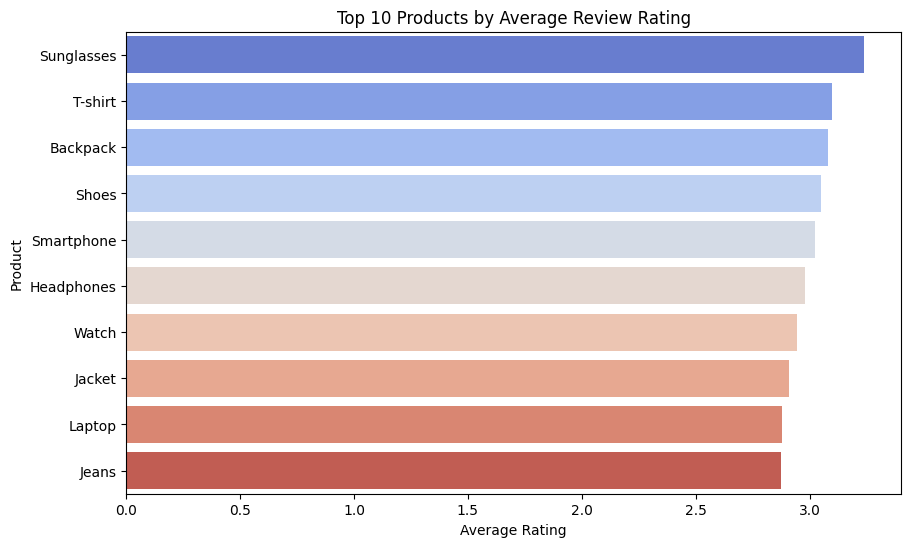

In [9]:
avg_ratings = df.groupby('product')['review_rating'].mean().sort_values(ascending=False).head(10)

plt.figure(figsize=(10,6))
sns.barplot(x=avg_ratings.values, y=avg_ratings.index, palette='coolwarm')
plt.title('Top 10 Products by Average Review Rating')
plt.xlabel('Average Rating')
plt.ylabel('Product')
plt.show()